# WeatherPy
----

#### Observations and Insights
* Scatter plot of Latitude Vs Temperature shows that as you move away from equator in either direction the Max Temperature of the palce decresaes
* Humidity tends to be higher as we move away from Equator
* There is negligible correlation between Windspeed and Latitude
* There is negligible correlation between Cloudiness and Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Ouput Directory for chart images
output_dir = "../output_data/"

# Output File for weather data (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Getting date when this notebook was executed
today_date = datetime.today().strftime('%m/%d/%Y')

'10/21/2020'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Creatint a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Creating subset of cities in count of 50
n = 50
def divide_cities(cities, n):
    for i in range(0, len(cities), n):
        yield cities[i:i + n]
cities = list(divide_cities(cities, n))

616


### Openweathermap API Calls

In [3]:
# Configuring gmaps information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Building partial query URL to be used for data pull request
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# creating list for response results to be stored
citynames = []
lat = []
lon = []
temp_max = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

print("Begining Data Retrieval")
print("------------------------------")
    
# looping through cities, making API request and append desired results into respective list
for idx1, city_list in enumerate(cities, start = 1):
    for idx2, city in enumerate(city_list):
        try:
            response = requests.get(query_url + city).json()
            print(f"Processing Record {idx2} of set {idx1} | {city}")
            citynames.append(response['name'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
        except KeyError:
            print("City not found. Skipping...")
    
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Begining Data Retrieval
------------------------------
Processing Record 0 of set 1 | ribeira grande
Processing Record 1 of set 1 | grindavik
Processing Record 2 of set 1 | christchurch
Processing Record 3 of set 1 | sedalia
Processing Record 4 of set 1 | la ciotat
Processing Record 5 of set 1 | lagoa
Processing Record 6 of set 1 | busselton
Processing Record 7 of set 1 | imatra
Processing Record 8 of set 1 | hobart
Processing Record 9 of set 1 | rikitea
Processing Record 10 of set 1 | felidhoo
City not found. Skipping...
Processing Record 11 of set 1 | chuy
Processing Record 12 of set 1 | longlac
City not found. Skipping...
Processing Record 13 of set 1 | tasiilaq
Processing Record 14 of set 1 | punta arenas
Processing Record 15 of set 1 | east london
Processing Record 16 of set 1 | namatanai
Processing Record 17 of set 1 | kigoma
Processing Record 18 of set 1 | tuktoyaktuk
Processing Record 19 of set 1 | mangrol
Processing Record 20 of set 1 | ribas do rio pardo
Processing Record 21 

Processing Record 35 of set 4 | pangnirtung
Processing Record 36 of set 4 | naze
Processing Record 37 of set 4 | fort nelson
Processing Record 38 of set 4 | sao felix do xingu
Processing Record 39 of set 4 | kombissiri
Processing Record 40 of set 4 | ahipara
Processing Record 41 of set 4 | banda aceh
Processing Record 42 of set 4 | ilulissat
Processing Record 43 of set 4 | kavieng
Processing Record 44 of set 4 | half moon bay
Processing Record 45 of set 4 | seoul
Processing Record 46 of set 4 | boajibu
Processing Record 47 of set 4 | khon buri
Processing Record 48 of set 4 | thompson
Processing Record 49 of set 4 | sitka
Processing Record 0 of set 5 | namibe
Processing Record 1 of set 5 | zverinogolovskoye
Processing Record 2 of set 5 | meulaboh
Processing Record 3 of set 5 | clyde river
Processing Record 4 of set 5 | ust-kuyga
Processing Record 5 of set 5 | chaohu
Processing Record 6 of set 5 | college
Processing Record 7 of set 5 | cherskiy
Processing Record 8 of set 5 | mildura
Proc

Processing Record 29 of set 8 | umzimvubu
City not found. Skipping...
Processing Record 30 of set 8 | bambous virieux
Processing Record 31 of set 8 | zhoucheng
Processing Record 32 of set 8 | ponta do sol
Processing Record 33 of set 8 | caxias
Processing Record 34 of set 8 | san rafael
Processing Record 35 of set 8 | quebo
Processing Record 36 of set 8 | nong chik
Processing Record 37 of set 8 | balaipungut
Processing Record 38 of set 8 | sazonovo
Processing Record 39 of set 8 | nome
Processing Record 40 of set 8 | baruun-urt
Processing Record 41 of set 8 | dongsheng
Processing Record 42 of set 8 | cayenne
Processing Record 43 of set 8 | raudeberg
Processing Record 44 of set 8 | guerrero negro
Processing Record 45 of set 8 | galich
Processing Record 46 of set 8 | salinas
Processing Record 47 of set 8 | esperance
Processing Record 48 of set 8 | evensk
Processing Record 49 of set 8 | de panne
Processing Record 0 of set 9 | umri
Processing Record 1 of set 9 | krasnoselkup
Processing Recor

Processing Record 18 of set 12 | kutum
Processing Record 19 of set 12 | ingham
Processing Record 20 of set 12 | kieta
Processing Record 21 of set 12 | toyooka
Processing Record 22 of set 12 | port keats
Processing Record 23 of set 12 | kautokeino
Processing Record 24 of set 12 | pilar
Processing Record 25 of set 12 | auki
Processing Record 26 of set 12 | komatipoort
Processing Record 27 of set 12 | vostok
Processing Record 28 of set 12 | borisoglebsk
Processing Record 29 of set 12 | coihaique
Processing Record 30 of set 12 | la libertad
Processing Record 31 of set 12 | byron bay
Processing Record 32 of set 12 | bukama
Processing Record 33 of set 12 | agha jari
City not found. Skipping...
Processing Record 34 of set 12 | la ronge
Processing Record 35 of set 12 | golyshmanovo
Processing Record 36 of set 12 | wilmington island
Processing Record 37 of set 12 | varnamo
Processing Record 38 of set 12 | harstad
Processing Record 39 of set 12 | naples
Processing Record 40 of set 12 | ranong
Pr

### Convert Raw Data to DataFrame

In [4]:
# Building a dataset from the response data saved in data lists.

weather_data = {"City": citynames
                ,"Lat": lat
                ,"Lon": lon
                ,"Max Temp": temp_max
                ,"Humidity": humidity
                ,"Cloudiness": cloudiness
                ,"Windspeed": windspeed
                ,"Country": country
                ,"Date": date
               }

# Converting the dataset into a Pandas Dataframe
weather_data = pd.DataFrame(weather_data)

# Previewing the Dataframe
weather_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Ribeira Grande,38.52,-28.70,60.8,67,40,6.93,PT,1603262680
1,Grindavik,63.84,-22.43,37.4,86,90,9.17,IS,1603262680
2,Christchurch,-43.53,172.63,59.0,67,0,8.05,NZ,1603262494
3,Sedalia,38.70,-93.23,46.4,93,1,8.05,US,1603262680
4,La Ciotat,43.17,5.60,61.0,79,53,5.01,FR,1603262681


In [5]:
# Describing the dataframe to understand limits in the data
weather_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.158161,22.005009,61.166655,72.266200,55.611208,7.865342,1.603263e+09
std,33.476365,91.344555,20.431672,22.622281,40.017972,5.436960,7.959458e+01
min,-54.800000,-179.170000,5.110000,1.000000,0.000000,0.090000,1.603262e+09
25%,-6.505000,-60.040000,46.390000,61.000000,7.500000,3.590000,1.603263e+09
50%,26.570000,26.890000,64.630000,77.000000,75.000000,6.820000,1.603263e+09
75%,48.855000,103.555000,77.855000,90.000000,94.000000,10.605000,1.603263e+09
max,78.220000,177.480000,100.400000,100.000000,100.000000,33.330000,1.603263e+09


## Inspecting the data and removing the cities where the humidity > 100%.

In [6]:
# Cleaning Weather data from dataframe, where humidity % is greater than 100
clean_weather_data = weather_data[weather_data["Humidity"]<=100.00]

# Describing the dataframe again to check the data limits
clean_weather_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,20.158161,22.005009,61.166655,72.266200,55.611208,7.865342,1.603263e+09
std,33.476365,91.344555,20.431672,22.622281,40.017972,5.436960,7.959458e+01
min,-54.800000,-179.170000,5.110000,1.000000,0.000000,0.090000,1.603262e+09
25%,-6.505000,-60.040000,46.390000,61.000000,7.500000,3.590000,1.603263e+09
50%,26.570000,26.890000,64.630000,77.000000,75.000000,6.820000,1.603263e+09
75%,48.855000,103.555000,77.855000,90.000000,94.000000,10.605000,1.603263e+09
max,78.220000,177.480000,100.400000,100.000000,100.000000,33.330000,1.603263e+09


In [7]:
# Previewing the Clean data
clean_weather_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Ribeira Grande,38.52,-28.70,60.8,67,40,6.93,PT,1603262680
1,Grindavik,63.84,-22.43,37.4,86,90,9.17,IS,1603262680
2,Christchurch,-43.53,172.63,59.0,67,0,8.05,NZ,1603262494
3,Sedalia,38.70,-93.23,46.4,93,1,8.05,US,1603262680
4,La Ciotat,43.17,5.60,61.0,79,53,5.01,FR,1603262681


In [8]:
# Naming the index of the dataframe for export to csv
clean_weather_data.index.names = ["City_ID"]

# Exporting the data to CSV file
clean_weather_data.to_csv(output_data_file)

## Plotting the Data

## Latitude vs. Temperature Plot

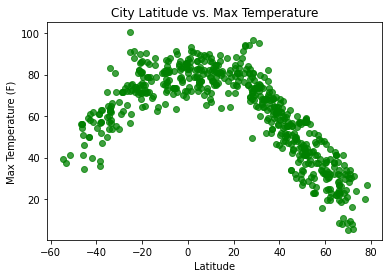

In [9]:
# Plotting scatter plot for Latitude Vs Temperature from Cleaned Data
plot_chart = plt.scatter(lat, temp_max, marker="o", facecolors="green", alpha=0.75)

# Setting up chart display parameters
plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name)


#### Observations
* Above scatter plot of Latitude Vs Temperature shows that as you move away from equator in either direction the Max Temperature of the palce decresaes

## Latitude vs. Humidity Plot

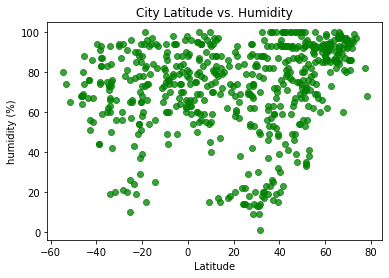

In [10]:
# Plotting scatter plot for Latitude Vs Humidity from Cleaned Data
plot_chart = plt.scatter(lat, humidity, marker="o", facecolors="green"
            , alpha=0.75)

# Setting up chart display parameters
plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("humidity (%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Humidity Plot.png"
export_chart.savefig(output_dir + file_name)

#### Observations
* Above scatter plot of Latitude Vs Humidity shows that Humidity tends to be higher as we move away from Equator towards Northern Hemisphere

## Latitude vs. Cloudiness Plot

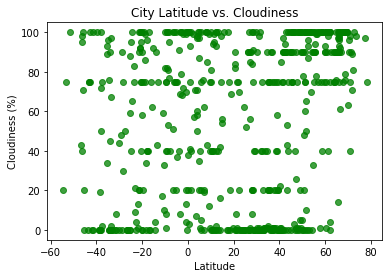

In [11]:
# Plotting scatter plot for Latitude Vs Cloudiness from Cleaned Data
plot_chart = plt.scatter(lat, cloudiness , marker="o", facecolors="green"
            , alpha=0.75)

# Setting up chart display parameters
plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name)


#### Observations
* It is difficult to interprete any relationship between Latitude and cloudiness.

## Latitude vs. Wind Speed Plot

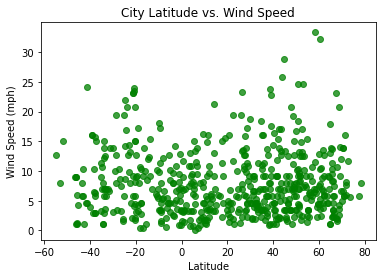

In [12]:
# Plotting scatter plot for Latitude Vs Windspeed from Cleaned Data
plot_chart = plt.scatter(lat, windspeed, marker="o", facecolors="green"
            , alpha=0.75)

# Setting up chart display parameters
plt.title(f"City Latitude vs. Wind Speed ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "Lat Vs Wind Speed Plot.png"
export_chart.savefig(output_dir + file_name)


#### Observations
* There are very few cities with windspeed > 25 mph and those are in Northern Hemisphere

## Linear Regression

In [ ]:
# Creating 2 dataframes for Northern and Southern Hemisphere
weather_data_n = clean_weather_data[clean_weather_data["Lat"]>=0.00]
weather_data_s = clean_weather_data[clean_weather_data["Lat"]<0.00]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

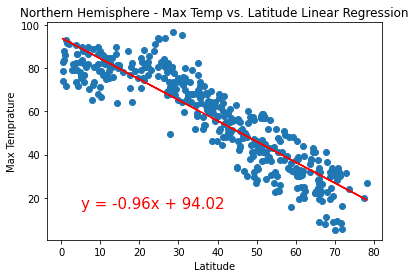

In [14]:
# Setting parameters for Linear Regression
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

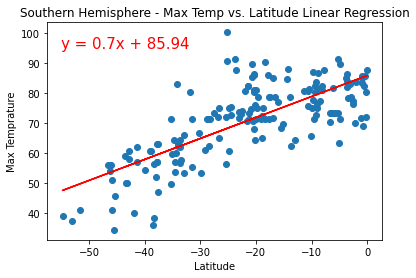

In [15]:
# Setting parameters for Linear Regression
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Temp Plot.png"
export_chart.savefig(output_dir + file_name)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

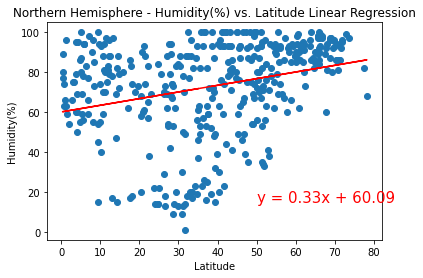

In [16]:
# Setting parameters for Linear Regression
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Humidity(%) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

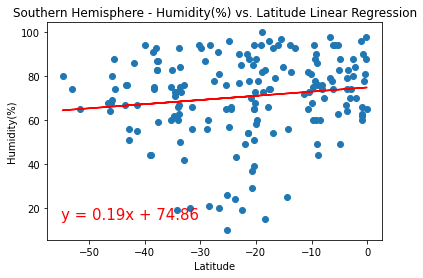

In [17]:
# Setting parameters for Linear Regression
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Humidity(%) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

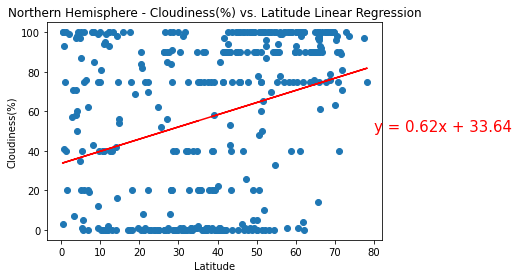

In [18]:
# Setting parameters for Linear Regression
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

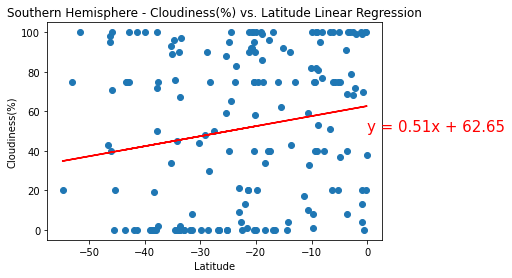

In [19]:
# Setting parameters for Linear Regression
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Cloudiness(%) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

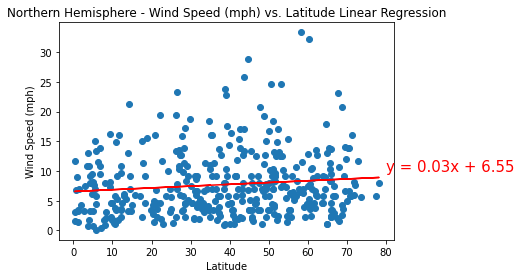

In [20]:
# Setting parameters for Linear Regression
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "NH - Lat Vs Wind Speed (mph) Plot.png"
export_chart.savefig(output_dir + file_name)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

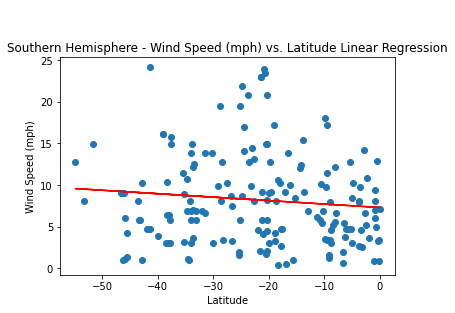

In [21]:
# Setting parameters for Linear Regression
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Calculating and storing predicted values from regression equation
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot_chart = plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Setting Chart Display Parameters
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Exporting chart to output folder in png format
export_chart = plot_chart.get_figure()
file_name = "SH - Lat Vs Wind Speed (mph) Plot.png"
export_chart.savefig(output_dir + file_name)